In [1]:
## Importing required Libraries
import os
import tensorflow as tf
from tensorboard.plugins import projector
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sb

In [2]:
df = pd.read_csv("User_Journey_Based_Features.csv")

#Make categorical columns as numerical
df['weekday']=df['weekday'].replace(['Mon','Tue','Wed','Thu','Fr','Sat','Sun'],[1,2,3,4,5,6,7])
df['timeOfDay']=df['timeOfDay'].replace(['Dawn','EarlyMorning','Morning','Noon','Afternoon','Evening','Night'],[1,2,3,4,5,6,7])
print(df.shape)
df.head()

(1076360, 16)


,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,InsessionCart,InsessionView,year,month,weekday,timeOfDay,Weekend,Purchase,cluster
0,1,1,0.0,939.28,939.28,0,0,0,0,2019,11,5,2,0,1,0
1,1,1,0.0,202.30,202.30,0,0,0,0,2019,11,7,5,0,1,0
2,1,1,0.0,617.52,617.52,0,0,0,0,2019,11,5,5,0,1,0
3,1,1,0.0,89.58,89.58,0,0,0,0,2019,11,6,2,0,1,0
4,1,1,0.0,46.33,46.33,0,0,0,0,2019,11,2,2,0,1,0


In [4]:
column_values = df["cluster"]. values. ravel()
unique_values_a = np.array(pd.unique(column_values))
unique_values=np.sort(unique_values_a)
print(unique_values)


[0 1 2 3 4]


In [5]:
purchase_percentage=np.zeros(np.shape(unique_values))
representation_percentage=np.zeros(np.shape(unique_values))
for index, item in enumerate(unique_values):
    locations=df.loc[df['cluster'] == item]
    purchase=locations.loc[locations['Purchase']==1]
    print('Number of records in cluster', item, '=', locations.shape[0])
    representation_percentage[index]=round((locations.shape[0]/df.shape[0])*100,2)
    purchase_percentage[index]=round((purchase.shape[0]/locations.shape[0])*100,2)
    
    

Number of records in cluster 0 = 1066615
Number of records in cluster 1 = 2664
Number of records in cluster 2 = 559
Number of records in cluster 3 = 4621
Number of records in cluster 4 = 1901


[9.909e+01 2.500e-01 5.000e-02 4.300e-01 1.800e-01]
[1.35 6.91 8.59 6.47 7.68]


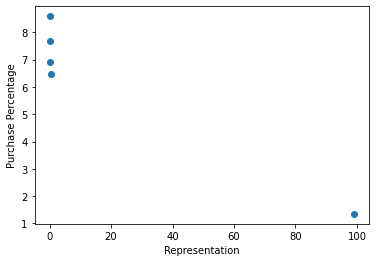

In [6]:
print((representation_percentage))
print(purchase_percentage)
import matplotlib.pyplot as plt
plt.scatter(representation_percentage,purchase_percentage)
plt.xlabel('Representation')
plt.ylabel('Purchase Percentage')
plt.show()

In [7]:
print(np.sum(purchase_percentage))

31.0


In [8]:
total_purchase=df.loc[df['Purchase']==1]

In [9]:
purchase_distrib=total_purchase.shape[0]/df.shape[0]
print(purchase_distrib*100)

1.402597643910959


In [10]:
#Data dim reduction followed by 70-30 split

In [11]:
#1. Lets find distances between clusters. Start with calinski-harabasz

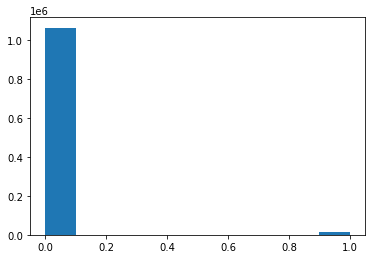

In [12]:
X=np.array(df[df.columns[0:8]])
#X=np.array(df[df.columns[0:13]])
#Normalize X to aid compute
#X_n = (X-X.min(axis=0)) / (X.max(axis=0)-X.min(axis=0))
Y=np.array(df[['Purchase', 'cluster']] )
plt.hist(Y[:,0])
#################################
#X=X[0:30000,:]
#Y=Y[0:30000]
#############################
pca = PCA(n_components=5)
pca.fit(X)
X1=pca.transform(X)


#start with 2 clusters to 5 and show CH score increases as clusters increase

In [13]:
X1_n = (X1-X1.min(axis=0)) / (X1.max(axis=0)-X1.min(axis=0))
X1=X1_n
print(X1[0:5,:])

[[6.13873989e-08 4.07296854e-01 1.20025576e-02 2.63611390e-01
  3.22195130e-01]
 [1.32213735e-08 1.40100233e-01 1.20699827e-02 2.63480629e-01
  3.22235297e-01]
 [4.03584696e-08 2.90640791e-01 1.20319949e-02 2.63554301e-01
  3.22212666e-01]
 [5.85445128e-09 9.92329050e-02 1.20802953e-02 2.63460629e-01
  3.22241440e-01]
 [3.02780660e-09 8.35523521e-02 1.20842522e-02 2.63452955e-01
  3.22243797e-01]]


In [14]:
from sklearn.model_selection import train_test_split


In [15]:
#train k-nn
from sklearn.neighbors import KNeighborsClassifier


In [17]:
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# Now loop through many simulations
import random
acc=0
rec=0
prec=0
f1=0
acc_c=np.zeros((5))
rec_c=np.zeros((5))
prec_c=np.zeros((5))
f1_c=np.zeros((5))
sims=10

for sim in range(sims):
    print('Simulation #=',sim)
    [X_train, X_test, y_train, y_test]=train_test_split(X1,Y,test_size=0.3, random_state=random.randint(0,1000),stratify=Y[:,1])
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train[:,0])
    #clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=2)
    #clf.fit(X_train, y_train[:,0])
    kpred=neigh.predict(X_test)
    acc   = acc+accuracy(y_test[:,0], kpred)
    rec   = rec+recall(y_test[:,0], kpred)
    prec  = prec+precision(y_test[:,0], kpred)
    f1    = f1+f1_score(y_test[:,0], kpred)
    for index, item in enumerate(unique_values):
        idx=np.where(y_test[:,1]==item)
        ytest_c=np.squeeze(y_test[idx,0])
        kpred_c=kpred[idx]
        #rint(ytest_c.shape,kpred_c.shape)
        acc_c[item]   = acc_c[item]+accuracy(ytest_c, kpred_c)
        rec_c[item]   = rec_c[item]+recall(ytest_c, kpred_c)
        prec_c[item]  = prec_c[item]+precision(ytest_c, kpred_c)
        f1_c[item]    = f1_c[item]+f1_score(ytest_c, kpred_c)
    
print(f'Overall Accuracy = {acc/sims}, Precision = {prec/sims}, Recall = {rec/sims}, F1-score = {f1/sims}')  
print(f'Per cluster Accuracy {np.true_divide(acc_c,sims)}, \n Precision {np.true_divide(prec_c,sims)}, \n Recall {np.true_divide(rec_c,sims)}, \n F1-score {np.true_divide(f1_c,sims)}') 

Simulation #= 0
Simulation #= 1
Simulation #= 2
Simulation #= 3
Simulation #= 4
Simulation #= 5
Simulation #= 6
Simulation #= 7
Simulation #= 8
